# Improvement: Initialization

A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error

Here are the initialization methods we will experiment with:  
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

### **Preparation**

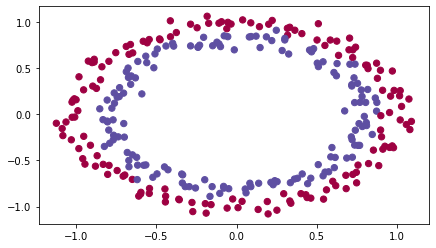

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_X = test_X.T
test_Y = test_Y.reshape((1, test_Y.shape[0]))

We are going to use a 3-layer NN with fixed amount of neurons.

In [2]:
def forwardprop(X,params):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    z1 = np.dot(W1, X) + b1
    a1 = np.maximum(0,z1)
    z2 = np.dot(W2, a1) + b2
    a2 = np.maximum(0,z2)
    z3 = np.dot(W3, a2) + b3
    a3 = 1/(1+np.exp(-z3))
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    return a3, cache

def compute_cost(a3,Y):
    cost = -1./Y.shape[1] * np.nansum(np.multiply(np.log(a3),Y)+np.multiply(np.log(1-a3),1-Y))
    return cost

def backprop(X,Y,cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {
        "dz3": dz3, "dW3": dW3, "db3": db3,
        "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
        "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1
    }
    return gradients

def gd(params, grads, alpha):
    for l in range(len(params) // 2):
        params["W"+str(l+1)] -= alpha*grads["dW"+str(l+1)]
        params["b"+str(l+1)] -= alpha*grads["db"+str(l+1)]
    return params

def predict(X, y, params):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    a3, caches = forwardprop(X, params)
    for i in range(0, a3.shape[1]):
        p[0,i] = 1 if a3[0,i]>0.5 else 0
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    return p

def predict_dec(params, X):
    a3, cache = forwardprop(X, params)
    predictions = (a3>0.5)
    return predictions

In [3]:
def model(X,Y,alpha=0.01,n_iterations=15000,print_cost=True,initialization="he"):
    # Set vars
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    # Init params
    if initialization == "zeros":
        params = init_params_zeros(layers_dims)
    elif initialization == "random":
        params = init_params_random(layers_dims)
    elif initialization == "he":
        params = init_params_he(layers_dims)
        
    # GD
    for i in range(0,n_iterations):
        a3, cache = forwardprop(X,params)
        cost = compute_cost(a3,Y)
        grads = backprop(X,Y,cache)
        params = gd(params, grads, alpha)
        if print_cost and i%1000 == 0:
            print("Cost after iteration {}: {}".format(i,cost))
            costs.append(cost)
    
    # plot cost
    plt.plot(costs)
    plt.title("Learning rate = "+str(alpha))
    plt.xlabel('iterations (per 100s)')
    plt.ylabel('cost')
    plt.show()
    return params

### 1) **Zero Initialization**
<br>
This is by far the least useful initialization since it fails to break symmetry.

In [4]:
def init_params_zeros(layers_dims):
    params = {}
    for l in range(1,len(layers_dims)):
        params['W'+str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        params['b'+str(l)] = np.zeros((layers_dims[l],1))
    return params

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


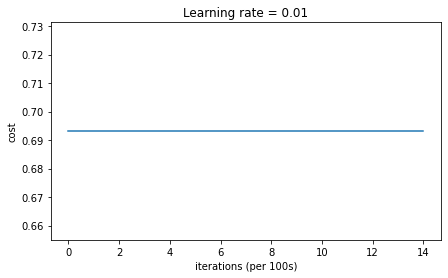

Accuracy: 0.5
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [5]:
params = model(train_X,train_Y,initialization="zeros")
pred_y = predict(test_X,test_Y,params)
print(pred_y)

Zero initialization sucks. It gives 0 for every test example.

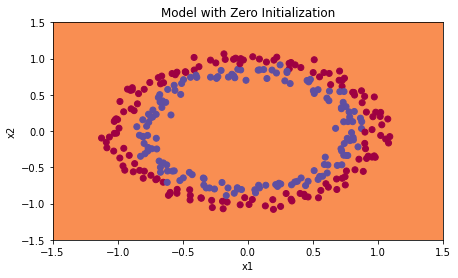

In [6]:
plt.title("Model with Zero Initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
pred_model = lambda x: predict_dec(params,x.T)
x_min, x_max = train_X[0,:].min()-1, train_X[0,:].max()+1
y_min, y_max = train_X[1,:].min()-1, train_X[1,:].max()+1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = pred_model(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
plt.scatter(train_X[0,:],train_X[1,:],c=train_Y,cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**LESSON**:
- $W^{[l]}$ should be initialized randomly to break symmetry.
- $b^{[l]}$ can be set to 0.

### 2) **Random Initialization**
<br>
Make the initialization random to break symmetry.

In [7]:
def init_params_random(layers_dims):
    np.random.seed(3)
    params = {}
    for l in range(1,len(layers_dims)):
        params['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        params['b'+str(l)] = np.zeros((layers_dims[l],1))
    return params

C:\Users\mikus\anaconda3\envs\mrq_venv_learn\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\mikus\anaconda3\envs\mrq_venv_learn\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250982793959966
Cost after iteration 2000: 0.5981216596703697
Cost after iteration 3000: 0.5638417572298645
Cost after iteration 4000: 0.5501703049199763
Cost after iteration 5000: 0.5444632909664456
Cost after iteration 6000: 0.5374513807000807
Cost after iteration 7000: 0.4764042074074983
Cost after iteration 8000: 0.39781492295092263
Cost after iteration 9000: 0.3934764028765484
Cost after iteration 10000: 0.3920295461882659
Cost after iteration 11000: 0.38924598135108
Cost after iteration 12000: 0.3861547485712325
Cost after iteration 13000: 0.384984728909703
Cost after iteration 14000: 0.3827828308349524


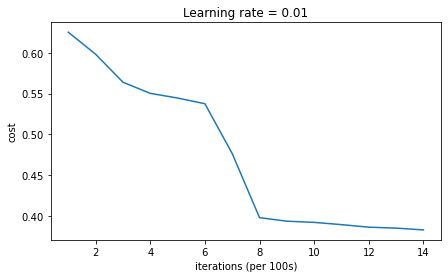

Accuracy: 0.86
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


In [8]:
params = model(train_X,train_Y,initialization="random")
pred_y = predict(test_X,test_Y,params)
print(pred_y)

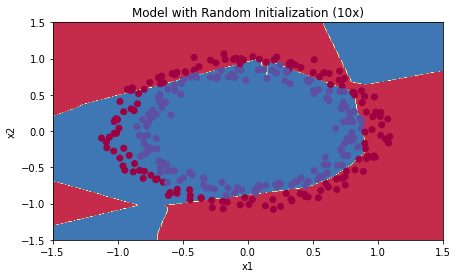

In [9]:
plt.title("Model with Random Initialization (10x)")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
pred_model = lambda x: predict_dec(params,x.T)
x_min, x_max = train_X[0,:].min()-1, train_X[0,:].max()+1
y_min, y_max = train_X[1,:].min()-1, train_X[1,:].max()+1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = pred_model(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
plt.scatter(train_X[0,:],train_X[1,:],c=train_Y,cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**LESSON**:
- Cost started high because of large random weights (10x).
- Initialization with overly large random weights will slow down the optimization.

### 3) **He Initialization**
<br>
How small should the initialization of random weights be?

Xavier Initialization uses a scaling factor of `sqrt(1./layers_dims[l-1])` for $W^{[l]}$.

He Initialization uses a scaling factor of `sqrt(2./layers_dims[l-1])`.

In [10]:
def init_params_he(layers_dims):
    np.random.seed(3)
    params = {}
    for l in range(1,len(layers_dims)):
        params['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        params['b'+str(l)] = np.zeros((layers_dims[l],1))
    return params

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


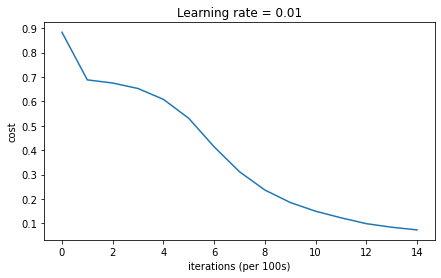

Accuracy: 0.96
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


In [11]:
params = model(train_X,train_Y,initialization="he")
pred_y = predict(test_X,test_Y,params)
print(pred_y)

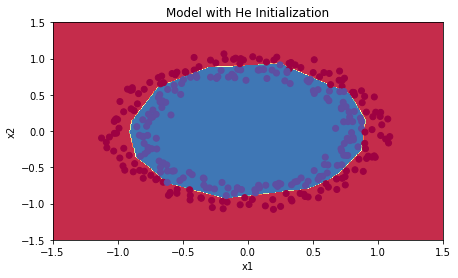

In [12]:
plt.title("Model with He Initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
pred_model = lambda x: predict_dec(params,x.T)
x_min, x_max = train_X[0,:].min()-1, train_X[0,:].max()+1
y_min, y_max = train_X[1,:].min()-1, train_X[1,:].max()+1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = pred_model(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
plt.scatter(train_X[0,:],train_X[1,:],c=train_Y,cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**LESSONS**:
- Initialization matters.
- Random initialization can break symmetry and make sure different hidden units can learn different things.
- Don't initialize to values that are too large.
- He initialization works well for ReLU activations.